# EDA

8/19: Currently this notebook contains various visuals, with no English descriptions.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
import sys
sys.path.append('../src/')
import aposch_functions as aposch

#### Get df05_train dataset

In [3]:
# read in data
data2019 = pd.read_csv('../data/2019_RAW_APC_Data.csv.gz')

# get df04
df04 = aposch.clean_data(data2019)

# split into test/train sets
df04_train, df04_test = train_test_split(df04,
                                         test_size=0.2,
                                         random_state=19)

# get cycle-related features
df05_train = aposch.do_cycles_processing(df04_train)

In [151]:
df = df05_train

## Headline plots

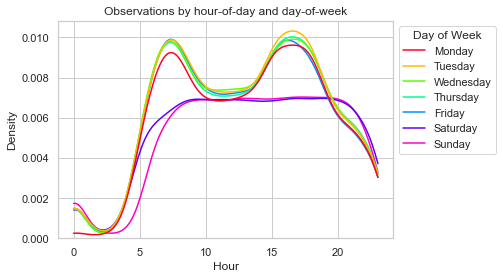

In [5]:
sns.set_theme(style='whitegrid')
ax = sns.kdeplot(x=df['Hour'], hue=df['DOW'],
                palette='gist_rainbow', bw_method=0.15, cut=0)
ax.set_title('Observations by hour-of-day and day-of-week')

ax.legend_.set_title('Day of Week')
new_labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
texts = ax.legend_.texts
for t, label in zip(texts, new_labels):
    t.set_text(label)
sns.move_legend(ax, "upper left", bbox_to_anchor = (1,1))

In [152]:
variables = ['passwithin','Removed01','Removed02A']
agg_df = df.groupby(['DOW','Hour'])[variables].agg(['mean','median','count'])

agg_df2 = df.groupby(['DOW','Hour'])['WOY'].nunique() # How many different weeks did this combo have any trains running?
agg_df = pd.concat([agg_df,agg_df2], axis=1).reset_index()

filt = agg_df['WOY'] > 13 # Only DOW-hour combos that occured more than 13 weeks of the year

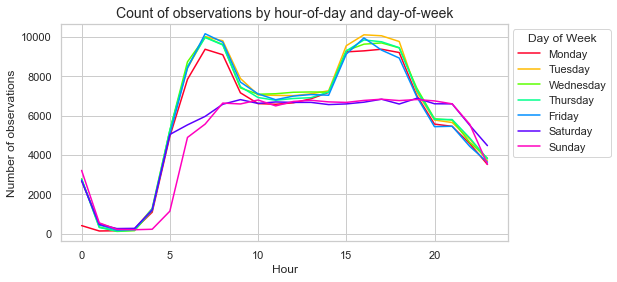

In [153]:
sns.set_theme(style='whitegrid')
ax = sns.lineplot(data=agg_df, x='Hour', y=('passwithin','count'), hue='DOW',
                palette='gist_rainbow')
ax.set_title('Count of observations by hour-of-day and day-of-week', size=14)
ax.set_ylabel('Number of observations')

ax.legend_.set_title('Day of Week')
new_labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
texts = ax.legend_.texts
for t, label in zip(texts, new_labels):
    t.set_text(label)
sns.move_legend(ax, 'upper left', bbox_to_anchor = (1,1))
plt.savefig('../images/CountObs1.png', bbox_inches='tight')

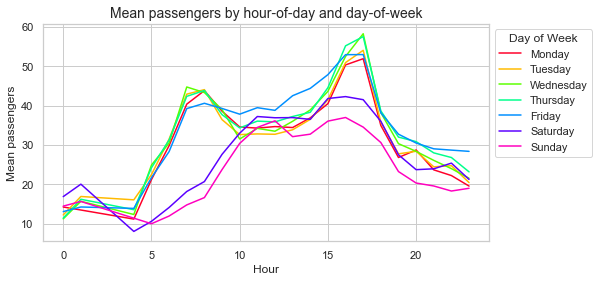

In [154]:
sns.set_theme(style='whitegrid')
ax = sns.lineplot(data=agg_df[filt], x='Hour', y=('passwithin','mean'), hue='DOW',
                palette='gist_rainbow')
ax.set_title('Mean passengers by hour-of-day and day-of-week',size=14)
ax.set_ylabel('Mean passengers')

ax.legend_.set_title('Day of Week')
new_labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
texts = ax.legend_.texts
for t, label in zip(texts, new_labels):
    t.set_text(label)
sns.move_legend(ax, "upper left", bbox_to_anchor = (1,1))
plt.savefig('../images/MeanPass1.png', bbox_inches='tight')

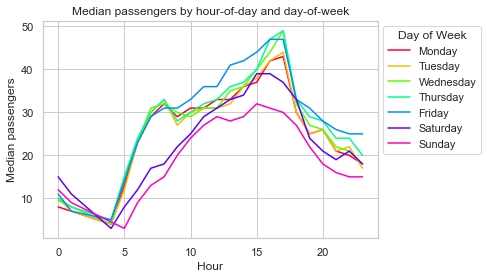

In [9]:
sns.set_theme(style='whitegrid')
ax = sns.lineplot(data=agg_df[filt], x='Hour', y=('passwithin','median'), hue='DOW',
                palette='gist_rainbow')
ax.set_title('Median passengers by hour-of-day and day-of-week')
ax.set_ylabel('Median passengers')

ax.legend_.set_title('Day of Week')
new_labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
texts = ax.legend_.texts
for t, label in zip(texts, new_labels):
    t.set_text(label)
sns.move_legend(ax, "upper left", bbox_to_anchor = (1,1))
plt.savefig('../images/MedianPass1.png', bbox_inches='tight')

Median passengers looks a bit different.
- AM rush hour median is less than AM rush hour average
- Median: AM to PM climb
- Median: Saturday around 12 noon something

Let's revisit this another time.

For now, keep working with mean.

## Other plots

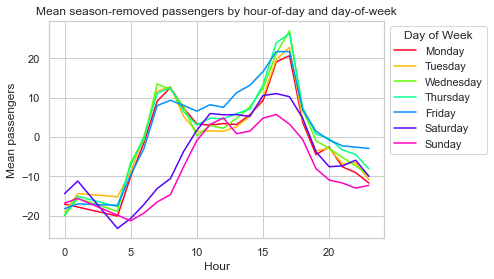

In [10]:
sns.set_theme(style='whitegrid')
ax = sns.lineplot(data=agg_df[filt], x='Hour', y=('Removed01','mean'), hue='DOW',
                palette='gist_rainbow')
ax.set_title('Mean season-removed passengers by hour-of-day and day-of-week')
ax.set_ylabel('Mean passengers')

ax.legend_.set_title('Day of Week')
new_labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
texts = ax.legend_.texts
for t, label in zip(texts, new_labels):
    t.set_text(label)
sns.move_legend(ax, "upper left", bbox_to_anchor = (1,1))

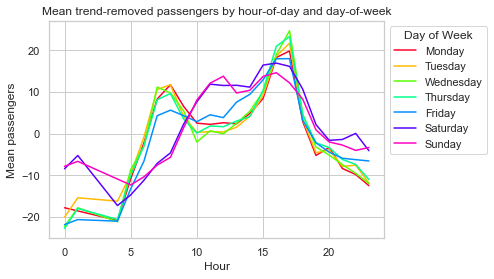

In [11]:
sns.set_theme(style='whitegrid')
ax = sns.lineplot(data=agg_df[filt], x='Hour', y=('Removed02A','mean'), hue='DOW',
                palette='gist_rainbow')
ax.set_title('Mean trend-removed passengers by hour-of-day and day-of-week')
ax.set_ylabel('Mean passengers')

ax.legend_.set_title('Day of Week')
new_labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
texts = ax.legend_.texts
for t, label in zip(texts, new_labels):
    t.set_text(label)
sns.move_legend(ax, "upper left", bbox_to_anchor = (1,1))

This plot just moved the lines up or down from where they were, but retains their shape.

## Visualize some Crowded (>74 passengers) observations

- choose a particular station
- choose a particular week

Wish list:
- horizontal line at 74
- nicer legend titles

In [159]:
# Figure out which week and station has the most Crowded observations occurring
agg_ser = df.groupby(['station name','WOY'])[['Crowded']].sum().sort_values()
agg_ser.tail(10)

TypeError: sort_values() missing 1 required positional argument: 'by'

In [161]:
filt3 = (df['station name']=='Pioneer') & (df['WOY']==34)

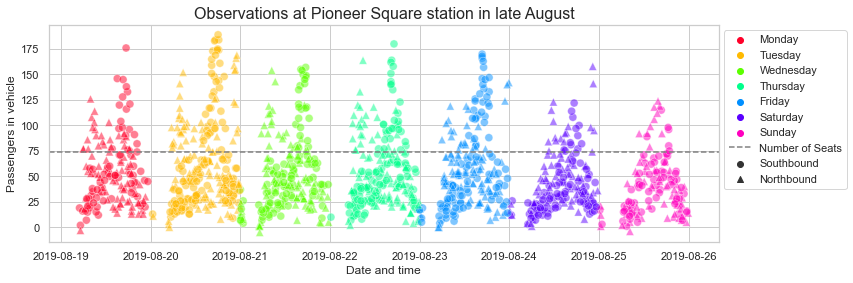

In [162]:
sns.set(rc={'figure.figsize':(12,4)},style='whitegrid')
ax = sns.scatterplot(data=df[filt3], x='stop arrival time', y='passwithin',
                      style='stadir_ID', 
                      markers=('o','^'),
                      alpha=0.5,
                      s=64,
                      hue='DOW',
                      palette='gist_rainbow')
ax.axhline(74, linestyle='--', color='gray', label='Seats in Vehicle') # horizontal line at Crowded threshold
ax.set_title('Observations at Pioneer Square station in late August', size=16)
ax.set_ylabel('Passengers in vehicle')
ax.set_xlabel('Date and time')

handles, labels = ax.get_legend_handles_labels()
new_labels = ['Monday','Tuesday','Wednesday','Thursday',
              'Friday','Saturday','Sunday','Number of Seats','Southbound','Northbound']
h_order = [1,2,3,4,5,6,7,11,9,10]
new_handles = [handles[x] for x in h_order]
ax.legend(new_handles, new_labels)
sns.move_legend(ax, "upper left", bbox_to_anchor = (1,1))
plt.savefig('../images/ScatterPioneer2.png', bbox_inches='tight')

Looking at the above plot gives us some insights.
- there more Crowded (>74 passengers) observations this station-week than in the dataset in general. By eye it appears that about a quarter of all these observations in Crowded.
- the most-crowded times were weekday mornings and weekday evenings
- on weekday mornings, all the most crowded trains were northbound
- on weekday evenings, all the most crowded trains were southbound
- on Tuesday, Friday, and Saturday, there were also a few very crowded northbound trains around 11pm. (Perhaps there was an event Tuesday night? A quick Google didn't turn up anything.)

## Visualize Crowded (>74) observations in Pioneer Southbound.

This is what I'm trying to predict in the predictive model phase.

How to structure this visualization? Let's do like Figure 3, but only one day (4am to 4am) and only Southbound. Show this for a Wednesday and for a Saturday. Call these Figure 3b and 3c.

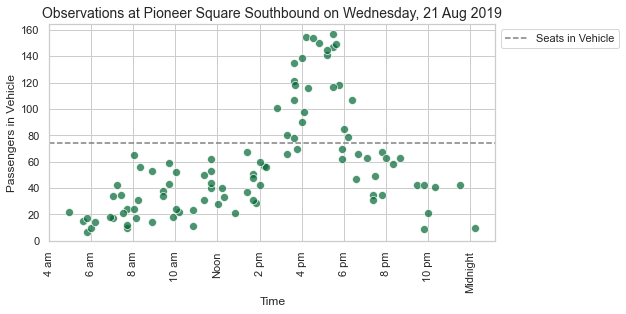

In [148]:
filt = (df['stadir_ID']==1211) & (df['stop arrival time'].between('2019-08-21 04:00','2019-08-22 04:00'))

sns.set(rc={'figure.figsize':(8,4)},style='whitegrid')
ax = sns.scatterplot(data=df[filt], x='stop arrival time', y='passwithin',
                      markers=('o'),
                      color=(0,0.4,0.2,0.7),
                      s=64)
ax.axhline(74, linestyle='--', color='gray', label='Seats in Vehicle') # horizontal line at Crowded threshold
ax.set_title('Observations at Pioneer Square Southbound on Wednesday, 21 Aug 2019', size=14)
ax.set_ylabel('Passengers in Vehicle')
ax.set_xlabel('Time')
xticks = ax.get_xticks()
xlab = ['4 am','6 am','8 am','10 am','Noon','2 pm','4 pm','6 pm','8 pm','10 pm','Midnight']
plt.xticks(ticks=xticks, labels=xlab, rotation=90)

ax.legend()
sns.move_legend(ax, "upper left", bbox_to_anchor = (1,1))

plt.savefig('../images/ScatterPioneerWeds.png', bbox_inches='tight')

val =ax.get_xlim()[1]-ax.get_xlim()[0]

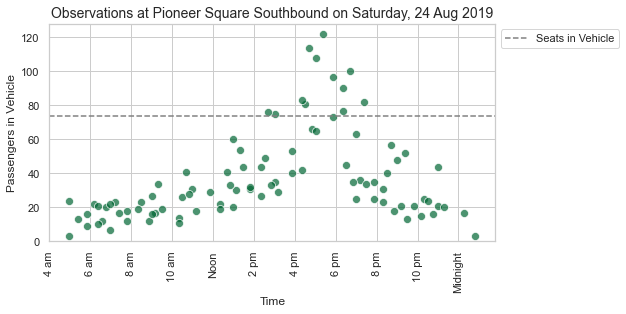

In [147]:
filt = (df['stadir_ID']==1211) & (df['stop arrival time'].between('2019-08-24 04:00','2019-08-25 04:00'))

sns.set(rc={'figure.figsize':(8,4)},style='whitegrid')
ax = sns.scatterplot(data=df[filt], x='stop arrival time', y='passwithin',
                      markers=('o'),
                      color=(0,0.4,0.2,0.7),
                      s=64)
ax.axhline(74, linestyle='--', color='gray', label='Seats in Vehicle') # horizontal line at Crowded threshold
ax.set_title('Observations at Pioneer Square Southbound on Saturday, 24 Aug 2019', size=14)
ax.set_ylabel('Passengers in Vehicle')
plt.ylim(bottom=0)
ax.set_xlabel('Time')
start, end = ax.get_xlim()
plt.xlim((end-0.90871, end))
xticks = ax.get_xticks()
xlab = ['4 am','6 am','8 am','10 am','Noon','2 pm','4 pm','6 pm','8 pm','10 pm','Midnight']
plt.xticks(ticks=xticks, labels=xlab, rotation=90)

ax.legend()
sns.move_legend(ax, "upper left", bbox_to_anchor = (1,1))

plt.savefig('../images/ScatterPioneerSat.png', bbox_inches='tight')

## Some of the above but only looking at Pioneer Southbound

In [155]:
ps = df['stadir_ID']==1211 # mask for pioneer southbound
variables = ['passwithin','Removed01','Removed02A']
ps_agg_df = df.loc[ps].groupby(['DOW','Hour'])[variables].agg(['mean','median','count'])

ps_agg_df2 = df.loc[ps].groupby(['DOW','Hour'])['WOY'].nunique() # How many different weeks did this combo have any trains running?
ps_agg_df = pd.concat([ps_agg_df,ps_agg_df2], axis=1).reset_index() # this appends that helpful column 'Weeks of Year' count

filt2 = ps_agg_df['WOY'] > 13 # Only DOW-hour combos that occured more than 13 weeks of the year

In [143]:
sum(filt2)

145

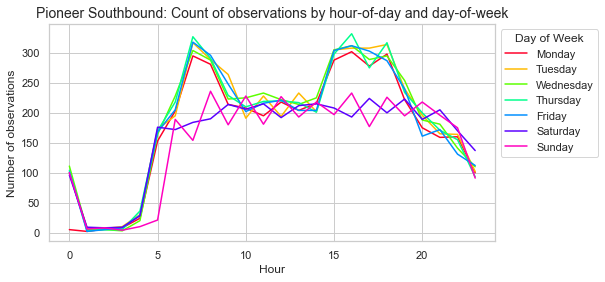

In [156]:
sns.set_theme(style='whitegrid')
ax = sns.lineplot(data=ps_agg_df, x='Hour', y=('passwithin','count'), hue='DOW',
                palette='gist_rainbow')
ax.set_title('Pioneer Southbound: Count of observations by hour-of-day and day-of-week', size=14)
ax.set_ylabel('Number of observations')

ax.legend_.set_title('Day of Week')
new_labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
texts = ax.legend_.texts
for t, label in zip(texts, new_labels):
    t.set_text(label)
sns.move_legend(ax, 'upper left', bbox_to_anchor = (1,1))
plt.savefig('../images/PSCountObs1.png', bbox_inches='tight')

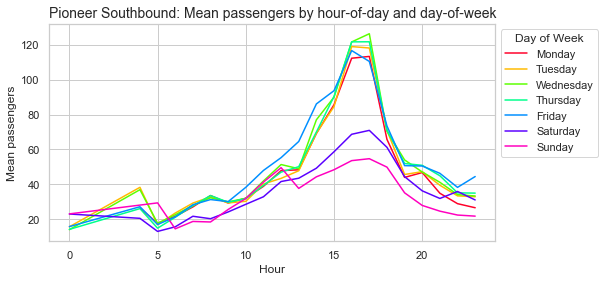

In [158]:
sns.set_theme(style='whitegrid')
ax = sns.lineplot(data=ps_agg_df[filt2], x='Hour', y=('passwithin','mean'), hue='DOW',
                palette='gist_rainbow')
ax.set_title('Pioneer Southbound: Mean passengers by hour-of-day and day-of-week', size=14)
ax.set_ylabel('Mean passengers')

ax.legend_.set_title('Day of Week')
new_labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
texts = ax.legend_.texts
for t, label in zip(texts, new_labels):
    t.set_text(label)
sns.move_legend(ax, "upper left", bbox_to_anchor = (1,1))
plt.savefig('../images/PSMeanPass1.png', bbox_inches='tight')

This plot shows that, on average we do expect the number of passengers to be >74 on weekdays from 4pm to 8pm.

## Some extra plots I made a couple months ago

In [ ]:
df = df04_train

ofinterest = ['AllObservations','Crowded','Supercrowded','Capacity','UnderNeg5','NegAFew']

for col in ofinterest:
    plt.subplots(figsize=(6, 2))
    plt.text(0.5, 0.5, col+' distribution by TOD and DOW', fontsize=28)
    plt.axis('off')
    b = sns.displot(x=df.loc[df[col],'Hour'], col=df.loc[df[col],'DOW'],
                binwidth=1, binrange=[0,24], hue=df.loc[df[col],'DOW'], palette='gist_rainbow', col_wrap=4)
    c = sns.displot(x=df.loc[df[col],'Hour'], hue=df.loc[df[col],'DOW'],
                kind='kde', palette='gist_rainbow').fig.suptitle(col)

In [ ]:
df = df04_train

ofinterest = ['AllObservations','Crowded','Supercrowded','Capacity','UnderNeg5','NegAFew']

for col in ofinterest:
    plt.subplots(figsize=(6, 2))
    plt.text(0.5, 0.5, col+' distribution by DOW and Season', fontsize=28)
    plt.axis('off')
    b = sns.displot(x=df.loc[df[col],'DOW'], col=df.loc[df[col],'Season'],
                    binwidth=1, binrange=[0,7], hue=df.loc[df[col],'Season'],
                    discrete=True,
                    palette = 'copper',
                    col_wrap=4)
    c = sns.displot(x=df.loc[df[col],'DOW'], hue=df.loc[df[col],'Season'],
                    kind='kde', bw_adjust = 3,
                    palette='copper').fig.suptitle(col)